## **Import libraries**


In [1]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 51.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from fuzzywuzzy import fuzz, process
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize


## **Read Dataset**


Dataset Link:
https://docs.google.com/spreadsheets/d/1P9_zO4HoqiXOW9fdhcHlZbRtr1JwWGQFjhAIQvI5e7M/edit?usp=sharing


The dataset can be accessed directly from Google Sheets, or alternatively, it may be downloaded and then uploaded to Colab.

In [3]:
url="https://docs.google.com/spreadsheets/d/1P9_zO4HoqiXOW9fdhcHlZbRtr1JwWGQFjhAIQvI5e7M/export?format=csv"

In [17]:
df=pd.read_csv(url)

In [18]:
print(df)

      Employee_ID             Name   Age  Department  Salary Joining_Date  \
0            2001     Anna Johnson  58.0  Operations   51000   2012-03-08   
1            2002    Emily Johnson  48.0  Operations   65000   2013-04-12   
2            2003       Mike Smith  34.0          HR   59000   2010-01-06   
3            2004    Anna Williams  27.0       Sales   56000   2016-04-28   
4            2005      Anna Miller  40.0          HR   58000   2013-05-30   
...           ...              ...   ...         ...     ...          ...   
1019         2278  Robert Williams  36.0  Operations   52000   2019-11-21   
1020         2279      John Miller  52.0          IT  115000   2010-03-06   
1021         2280       Anna Jones  31.0  Operations   70000   2018-10-28   
1022         2281    Sophia Garcia  41.0   Marketing   69000   2014-06-18   
1023         2282       Mike Jones   NaN       Sales   66000   2016-07-22   

             City  
0     Los Angeles  
1         Chicago  
2        New Yo

### **Information about dataset**

In [6]:
df.head()

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
0,2001,Anna Johnson,58.0,Operations,51000,2012-03-08,Los Angeles
1,2002,Emily Johnson,48.0,Operations,65000,2013-04-12,Chicago
2,2003,Mike Smith,34.0,HR,59000,2010-01-06,New York
3,2004,Anna Williams,27.0,Sales,56000,2016-04-28,Los Angeles
4,2005,Anna Miller,40.0,HR,58000,2013-05-30,Phoenix


In [7]:
df.tail()

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
1019,2278,Robert Williams,36.0,Operations,52000,2019-11-21,Houston
1020,2279,John Miller,52.0,IT,115000,2010-03-06,Phoenix
1021,2280,Anna Jones,31.0,Operations,70000,2018-10-28,Chicago
1022,2281,Sophia Garcia,41.0,Marketing,69000,2014-06-18,Houston
1023,2282,Mike Jones,NaN,Sales,66000,2016-07-22,Houston


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employee_ID   1024 non-null   int64  
 1   Name          1024 non-null   object 
 2   Age           942 non-null    float64
 3   Department    1024 non-null   object 
 4   Salary        1024 non-null   int64  
 5   Joining_Date  1024 non-null   object 
 6   City          1024 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 56.1+ KB


In [9]:
df.shape

(1024, 7)

### **Statistical Summary**

In [10]:
df.describe()

,Employee_ID,Age,Salary
count,1024.000000,942.000000,1024.000000
mean,2495.109375,40.131635,62390.625000
std,287.528729,11.998303,14681.025252
min,2001.000000,20.000000,30000.000000
25%,2256.750000,30.000000,51000.000000
50%,2488.500000,41.000000,61000.000000
75%,2744.250000,51.000000,73000.000000
max,3000.000000,60.000000,115000.000000


In [11]:
df.describe(include='all')

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
count,1024.000000,1024,942.000000,1024,1024.000000,1024,1024
unique,NaN,100,NaN,14,NaN,874,5
top,NaN,Sophia Garcia,NaN,Marketing,NaN,2019-11-20,Chicago
freq,NaN,18,NaN,187,NaN,4,218
mean,2495.109375,NaN,40.131635,NaN,62390.625000,NaN,NaN
std,287.528729,NaN,11.998303,NaN,14681.025252,NaN,NaN
min,2001.000000,NaN,20.000000,NaN,30000.000000,NaN,NaN
25%,2256.750000,NaN,30.000000,NaN,51000.000000,NaN,NaN
50%,2488.500000,NaN,41.000000,NaN,61000.000000,NaN,NaN
75%,2744.250000,NaN,51.000000,NaN,73000.000000,NaN,NaN


In [12]:
df.describe(include='object')

,Name,Department,Joining_Date,City
count,1024,1024,1024,1024
unique,100,14,874,5
top,Sophia Garcia,Marketing,2019-11-20,Chicago
freq,18,187,4,218


In [13]:
df.describe(include=['int','float'])

,Employee_ID,Age,Salary
count,1024.000000,942.000000,1024.000000
mean,2495.109375,40.131635,62390.625000
std,287.528729,11.998303,14681.025252
min,2001.000000,20.000000,30000.000000
25%,2256.750000,30.000000,51000.000000
50%,2488.500000,41.000000,61000.000000
75%,2744.250000,51.000000,73000.000000
max,3000.000000,60.000000,115000.000000


### **Data Type Converions**
**Convert order_date into datetime format.**

In [19]:
df['Joining_Date'].head()

,Joining_Date
0,2012-03-08
1,2013-04-12
2,2010-01-06
3,2016-04-28
4,2013-05-30


In [20]:
df['Joining_Date']=pd.to_datetime(df['Joining_Date'], format="%Y-%m-%d" , errors="coerce")

In [21]:
df['Joining_Date'].head()

,Joining_Date
0,2012-03-08
1,2013-04-12
2,2010-01-06
3,2016-04-28
4,2013-05-30


### **Duplicate values**

Check for duplicate rows and remove them if any.


In [22]:
df.duplicated().sum()

np.int64(19)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

np.int64(0)

### **Missing value**


In [25]:
df.isnull().sum()

,0
Employee_ID,0
Name,0
Age,81
Department,0
Salary,0
Joining_Date,0
City,0


In [26]:
df['Age'].sample(15)

,Age
952,34.0
590,39.0
537,26.0
109,NaN
446,22.0
259,NaN
942,21.0
416,NaN
30,22.0
143,25.0


**Fill age with appropriate method(mean,median, interpolation)**

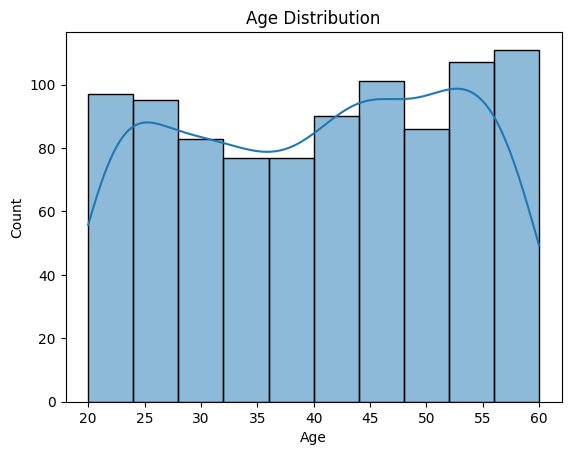

In [27]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [28]:
pd.set_option('future.no_silent_downcasting', True)

In [29]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [30]:
df['Age'].isnull().sum()

np.int64(0)

## **Observations**

1. *Use Mean* → Suitable for the current Age data since it is balanced with no

extreme skew.

2. *Use Median* → Appropriate only if skewness or outliers are detected.

3. *Use Interpolatio*n → Applicable only for time-series or ordered data.

### **Display Unique values in Departments and City columns**

In [31]:
df['Department'].unique()

array(['Operations', 'HR', 'Sales', 'Marketing', 'Finance', 'IT',
       'marketing', '        HR', 'IT.', 'Operationsssss', 'Marketingg',
       'Marke ting', 'HR.', '     IT    '], dtype=object)

In [32]:
df['City'].unique()

array(['Los Angeles', 'Chicago', 'New York', 'Phoenix', 'Houston'],
      dtype=object)

### **Clean the department column**

In [33]:
# Define a list of expected department names
expected_departments = ['Operations', 'HR', 'Sales', 'Marketing', 'Finance', 'IT']

In [34]:
# Define a list of expected department names
expected_departments = ['Operations', 'HR', 'Sales', 'Marketing', 'Finance', 'IT']

# Function to find the best match for a given department name
def clean_department(department, min_score=80):
    if pd.isna(department):
        return department
    # Remove leading/trailing spaces and convert to lowercase for better matching
    department = department.strip().lower()
    # Find the best match from the expected department names
    match, score = process.extractOne(department, [d.lower() for d in expected_departments], scorer=fuzz.ratio)
    # If the score is above the threshold, return the correctly capitalized expected department name
    if score >= min_score:
        return expected_departments[[d.lower() for d in expected_departments].index(match)]
    else:
        return department # Return the original if no good match is found

In [35]:
# Apply the cleaning function to the 'Department' column
df['Department'] = df['Department'].apply(clean_department)

# Display the unique values after cleaning
print(df['Department'].unique())

['Operations' 'HR' 'Sales' 'Marketing' 'Finance' 'IT']


### **Fuzzy Matching**

**Try different minimum_scores like 95, 90, 80**.

In [36]:
for t in [95, 90, 80]:
    print(f"\nThreshold = {t}")
    for val in expected_departments:
        print(val, "→", clean_department(val, min_score=t))


Threshold = 95
Operations → Operations
HR → HR
Sales → Sales
Marketing → Marketing
Finance → Finance
IT → IT

Threshold = 90
Operations → Operations
HR → HR
Sales → Sales
Marketing → Marketing
Finance → Finance
IT → IT

Threshold = 80
Operations → Operations
HR → HR
Sales → Sales
Marketing → Marketing
Finance → Finance
IT → IT


### **Detect Outliers**

#### **Boxplot**
**Plot the boxplot of column "Salary".**


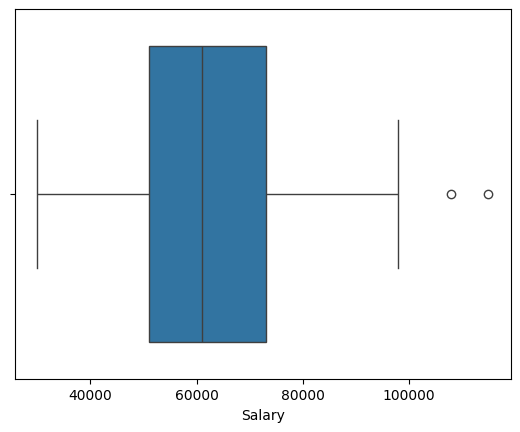

In [37]:
sns.boxplot(x=df['Salary'])
plt.show()

#### **IQR**
**Find outliers using IQR method**

1. Find Q1, Q3, IQR, lower_bound and upper bound.
2. Display the values of price if its less than lower_bound or greater than upper_bound.
3. If there is no value, then it means there is no outlier.


In [38]:
Q1=df['Salary'].quantile(0.25)
Q3=df['Salary'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df[(df['Salary']<lower_bound) | (df['Salary']>upper_bound)]

,Employee_ID,Name,Age,Department,Salary,Joining_Date,City
1006,2265,David Davis,54.0,IT,108000,2015-05-31,Los Angeles
1020,2279,John Miller,52.0,IT,115000,2010-03-06,Phoenix


### **Winsorize**

**Apply Winsorization to cap the extreme 5% of values from both lower and upper ends of the Salary distribution**

In [39]:
print("Before Winsorization:\n",df['Salary'].head())

Before Winsorization:
 0    51000
1    65000
2    59000
3    56000
4    58000
Name: Salary, dtype: int64


In [40]:
#  Winsorization (5% lower, 5% upper)
df['Salary_winsorized'] = winsorize(df['Salary'], limits=[0.05, 0.05])
df['Salary_winsorized'].head()

,Salary_winsorized
0,51000
1,65000
2,59000
3,56000
4,58000


In [41]:
print("Before Winsorization:", df['Salary'].min(), df['Salary'].max())
print("After Winsorization:", df['Salary_winsorized'].min(), df['Salary_winsorized'].max())

Before Winsorization: 30000 115000
After Winsorization: 40000 87000
